## Subset Gridded Static Inputs for CONUS2 ParFlow domain for a given HUC

### import libraries and register pin 

In all examples you will need to import the following packages and register your pin in order to have access to the HydroData datasets

Refer to the [getting started](https://hydroframesubsettools.readthedocs.io/en/latest/getting_started.html) instructions for creating your pin if you have not done this already.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from parflow import Run
from parflow.tools.io import read_pfb, read_clm, write_pfb
from parflow.tools.fs import mkdir
from parflow.tools.settings import set_working_directory
import subsettools as st
import hf_hydrodata as hf

# register PIN / sign up here: https://hydrogen.princeton.edu/pin
# hf.register_api_pin("<email>", "<PIN>")


In [ ]:
# calculate the HUC bounds, HUC 4 Upper Susquehanna
# https://water.usgs.gov/wsc/sub/0205.html

# change the hucs=["0205"] to the desired HUC4
ij_huc_bounds, mask = st.define_huc_domain(hucs=["0205"], grid="conus2")
print(f"bounding box: {ij_huc_bounds}")

bounding box: (3672, 1827, 3963, 2223)


In [ ]:
# set a directory for the files to be written
# uncomment and set the path to your desired directory and include the HUC number
#static_write_dir = "/Users/<path>/<to>/<your>/<files>/huc0205"

#set the runname to be the HUC number you are working with
runname = "HUC0205"
# create the directory if it doesn't exist
if not os.path.exists(static_write_dir):
    os.makedirs(static_write_dir)



# set the HUCs you want to work with
hucs = ["0205"]

# nothing should need to be changed below this point
grid = "conus2"
var_ds = "conus2_domain"

# cluster topology
P = 1
Q = 1

mask_solid_paths = st.write_mask_solid(mask=mask, grid=grid, write_dir=static_write_dir)

ij_bounds, mask = st.define_huc_domain(hucs=hucs, grid=grid)
print("ij_bound returns [imin, jmin, imax, jmax]")
print(f"bounding box: {ij_bounds}")

nj = ij_bounds[3] - ij_bounds[1]
ni = ij_bounds[2] - ij_bounds[0]
print(f"nj: {nj}")
print(f"ni: {ni}")

static_paths = st.subset_static(ij_bounds, dataset=var_ds, write_dir=static_write_dir)

Wrote mask.pfb
Wrote solidfile and mask_vtk with total z of 2000 meters
ij_bound returns [imin, jmin, imax, jmax]
bounding box: (3672, 1827, 3963, 2223)
nj: 396
ni: 291


/tmp/ipykernel_34596/2262804010.py:33: DeprecationWarning: Note that for subsettools versions >= 2.0.0, this function will raise a ValueError if a variable in var_list is not supported in the dataset. (In older versions, it just printed an error message and continued executing normally). You can check in the HydroData documentation which variables are contained in each dataset (https://hf-hydrodata.readthedocs.io/en/latest/available_data.html).
  static_paths = st.subset_static(ij_bounds, dataset=var_ds, write_dir=static_write_dir)


Wrote slope_x.pfb in specified directory.
Wrote slope_y.pfb in specified directory.
Wrote pf_indicator.pfb in specified directory.
Wrote mannings.pfb in specified directory.
Wrote pf_flowbarrier.pfb in specified directory.
Wrote pme.pfb in specified directory.
Wrote ss_pressure_head.pfb in specified directory.


(396, 291)


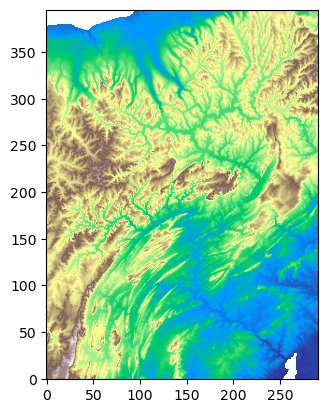

In [4]:
#Manually get the dem from HydroData

dataset = "conus2_domain"
grid = "conus2"
var_ds = "conus2_domain"
bounds = ij_bounds

options = {"dataset":dataset, "variable":"elevation", "grid_bounds":bounds }
dem = hf.get_gridded_data(options)

# plot the dem
plt.imshow(dem, cmap="terrain", origin="lower")

write_pfb(static_write_dir+"/dem.pfb", dem, p=1,
    q=1,
    r=1,
    x=0.0,
    y=0.0,
    z=0.0,
    dx=1000.0,
    dy=1000.0,
    dz=0.1)
print(dem.shape)

(396, 291)
nan nan


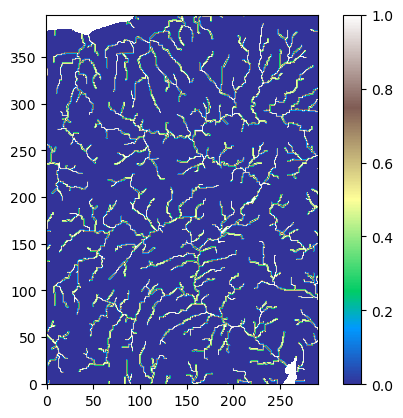

In [ ]:
# Manually get the stream segments from HydroData
dataset = "conus2_domain"
grid = "conus2"
var_ds = "conus2_domain"
bounds = ij_bounds

options = {"dataset":dataset, "variable":"stream_segments", "grid_bounds":bounds }
stream_HUC = hf.get_gridded_data(options)

print(stream_HUC.shape)
print(np.max(stream_HUC), np.min(stream_HUC))
# map stream segments to values of 1
stream_HUC[stream_HUC>0] = 1
# plot the streams
str= plt.imshow(stream_HUC, cmap="terrain", origin="lower") 
plt.colorbar(str, ax=plt.gca())
plt.show()

write_pfb(static_write_dir+"/streams.pfb", stream_HUC, p=1,
    q=1,
    r=1,
    x=0.0,
    y=0.0,
    z=0.0,
    dx=1000.0,
    dy=1000.0,
    dz=0.1)

(1, 396, 291)
1.0 0.0


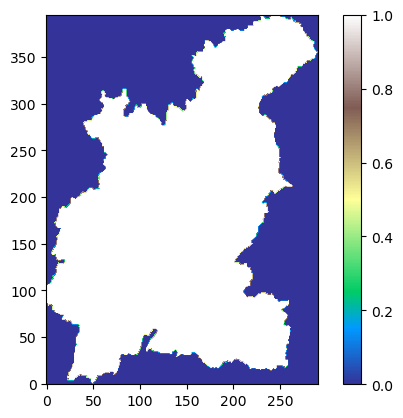

In [6]:
# load and plot the mask

maskfile = static_write_dir+'/mask.pfb'
mask = read_pfb(maskfile)
print(mask.shape)

print(np.max(mask), np.min(mask))
# map stream segments to values of 1
#stream_HUC[stream_HUC>0] = 1
# plot the dem
str= plt.imshow(mask[0,:,:], cmap="terrain", origin="lower") 
plt.colorbar(str, ax=plt.gca())
plt.show()


### plot some of the files as a check

We use the `read_pfb` function [from PFTools](https://parflow.readthedocs.io/en/latest/python/tutorials/pfb.html#loading-pfb-from-python) to read the subset data in and plot it. We will plot the indicator file and the initial pressure data over the whole bounding box. By replacing the filepath in the code below, we can plot any static input or the initial pressure data.

Text(0.5, 1.0, 'Flow barrier layer 3 (from bottom)')

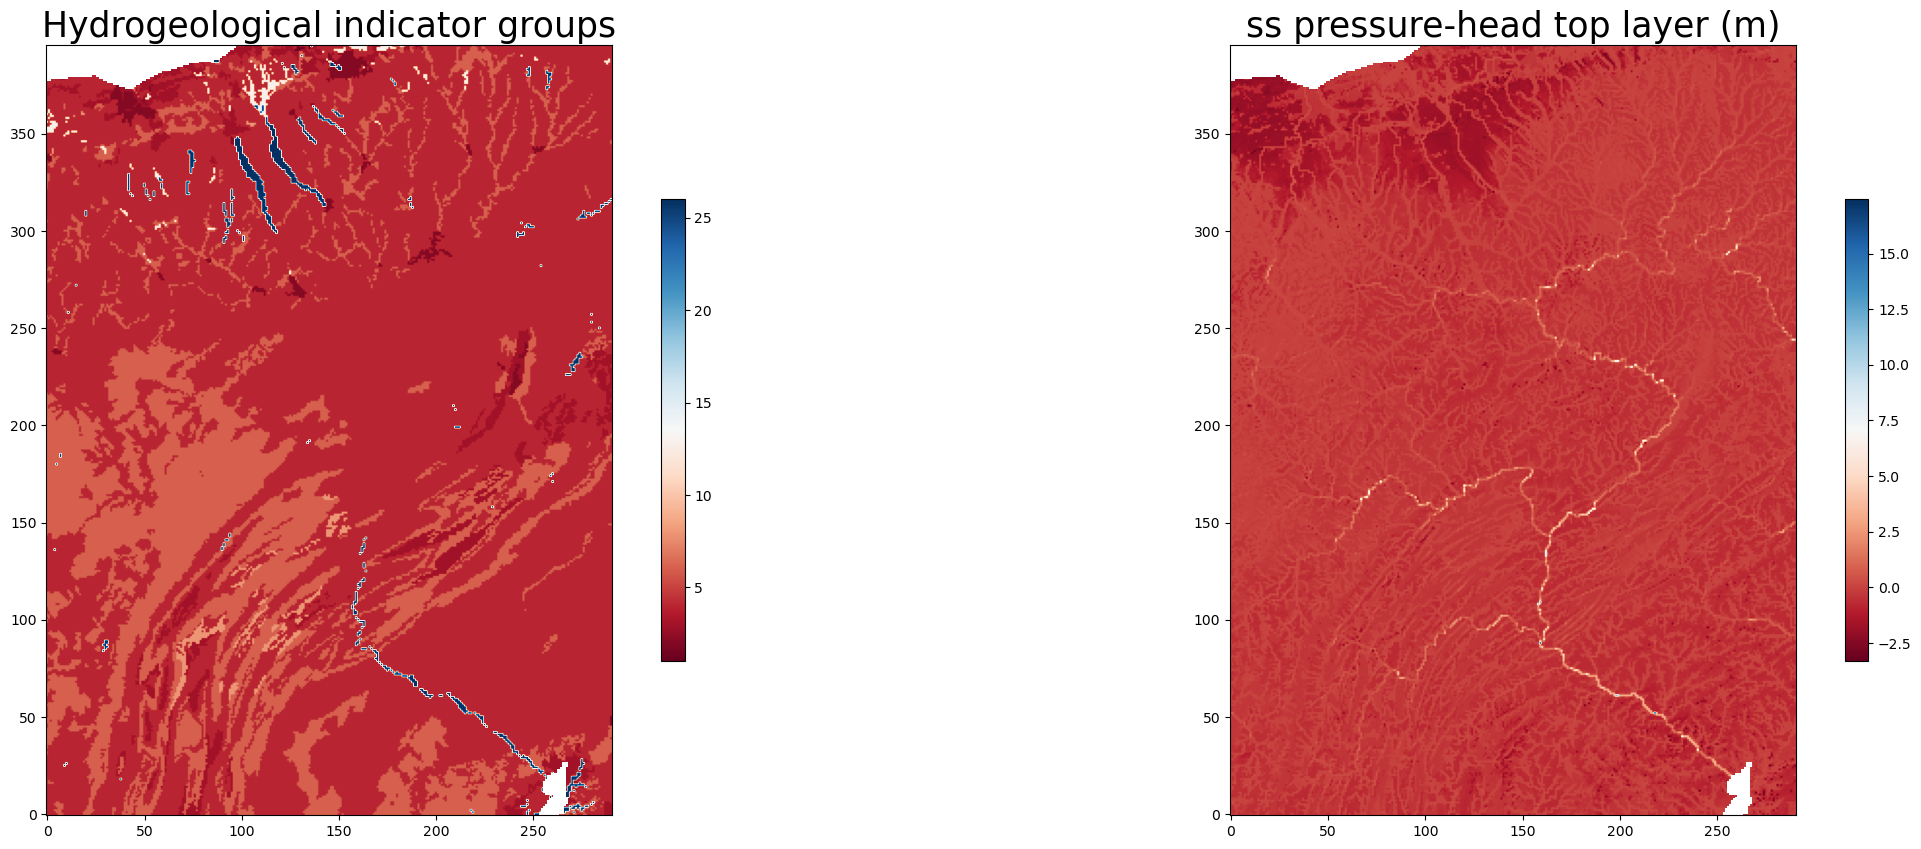

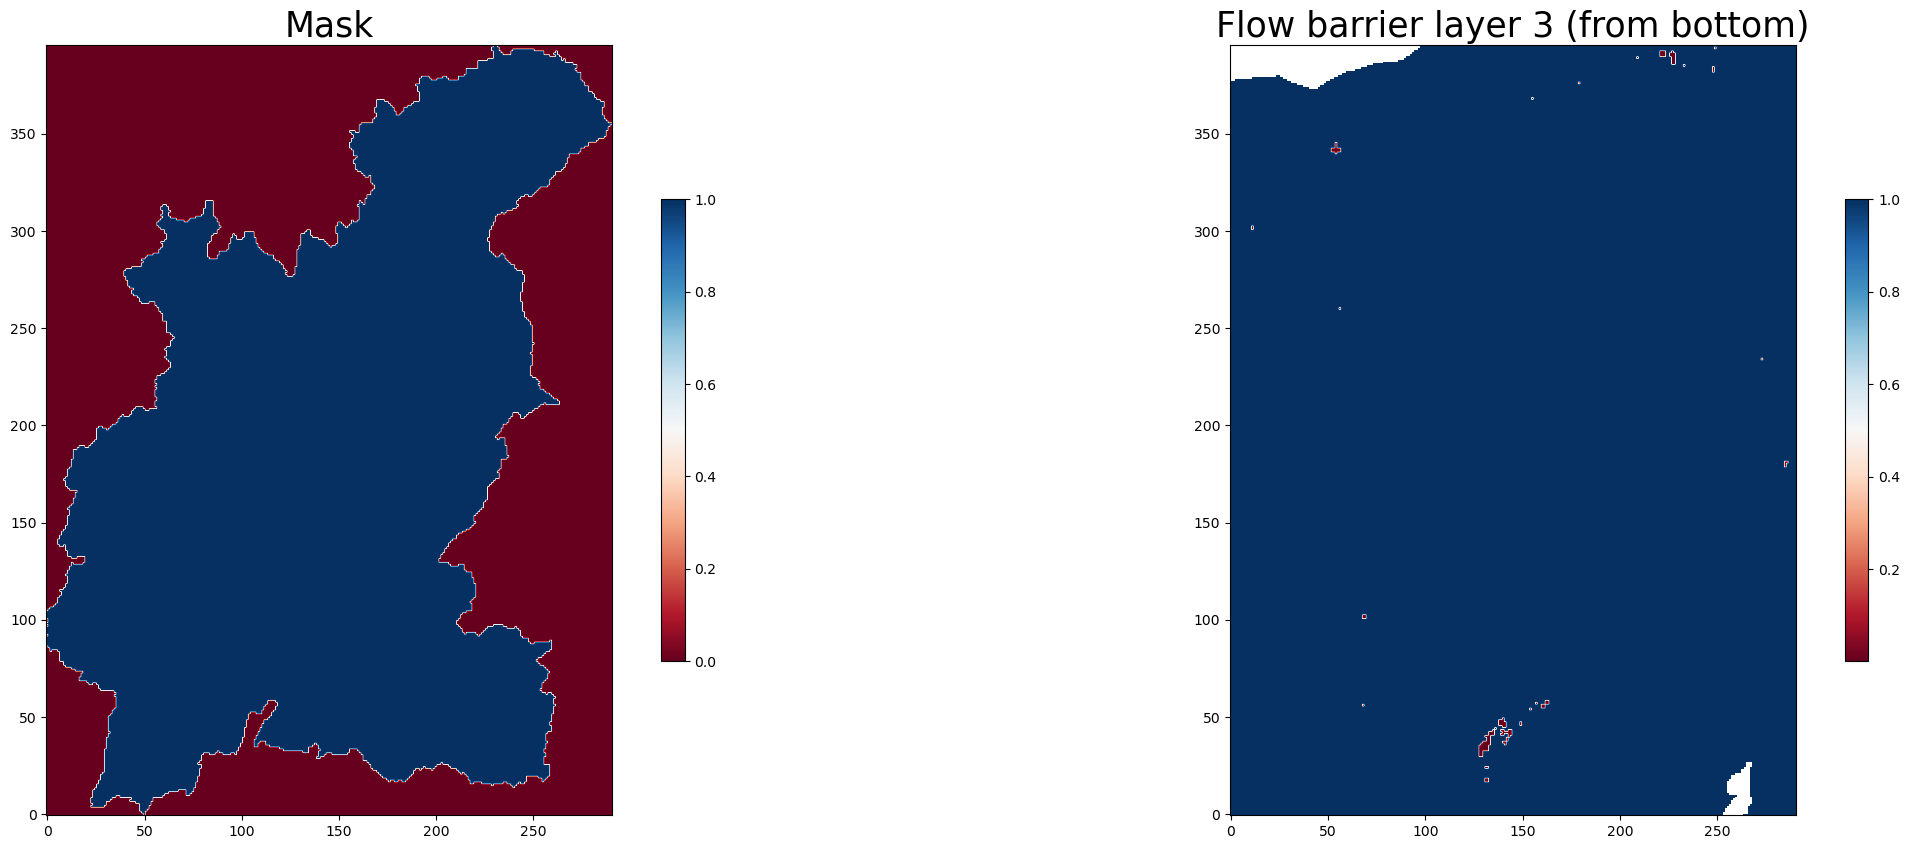

In [8]:
static_filepaths = static_write_dir
indicator_filepath = static_write_dir+"/pf_indicator.pfb"
press_SS_filepath = static_write_dir+"/ss_pressure_head.pfb"
flow_barrier_filepath = static_write_dir+"/pf_flowbarrier.pfb"
mask_filepath = static_write_dir+"/mask.pfb"
fig, axs = plt.subplots(1, 2, figsize=(28, 10))

ax0 = axs[0]
filename = indicator_filepath
data = read_pfb(filename)[9]
im0 = ax0.imshow(data, cmap="RdBu", origin='lower')
colorbar1 = fig.colorbar(im0, ax=ax0, shrink=0.6)
ax0.set_title(f'Hydrogeological indicator groups', fontsize = 25)

ax1 = axs[1]
filename = press_SS_filepath
data = read_pfb(filename)[9] # pick the top layer of the pressure data
im1 = ax1.imshow(data, cmap = "RdBu", origin='lower')
colorbar1 = fig.colorbar(im1, ax=ax1, shrink=0.6)
ax1.set_title(f'ss pressure-head top layer (m)', fontsize = 25)

fig, axs = plt.subplots(1, 2, figsize=(28, 10))

ax0 = axs[0]
filename = mask_filepath
data = read_pfb(filename)[0]
im0 = ax0.imshow(data, cmap="RdBu", origin='lower')
colorbar1 = fig.colorbar(im0, ax=ax0, shrink=0.6)
ax0.set_title(f'Mask', fontsize = 25)

ax1 = axs[1]
filename = flow_barrier_filepath
data = read_pfb(filename)[3] # pick the bottom layer of the flow barrier
im1 = ax1.imshow(data, cmap = "RdBu", origin='lower')
colorbar1 = fig.colorbar(im1, ax=ax1, shrink=0.6)
ax1.set_title(f'Flow barrier layer 3 (from bottom)', fontsize = 25)